In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#true false array yada one hot encoding ile dönüştürülmüş bir dataframe gerek bu yüzden mlxtend kütüphanesini kuruyoruz
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# Veri Setini okuma
data = pd.read_csv("Groceries_dataset.csv")

In [3]:
# veriye ilk bakış
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [4]:
# Boyut bilgisi veri setimiz 38765 satır ve 3 sütundan oluşmaktadır
data.shape

(38765, 3)

In [5]:
# veri seti hakkında bilgiler
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# Veri setinde eksik gözlem olup olmadıgını kontrol etme -> Hiç eksik gözlem yokmuş
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

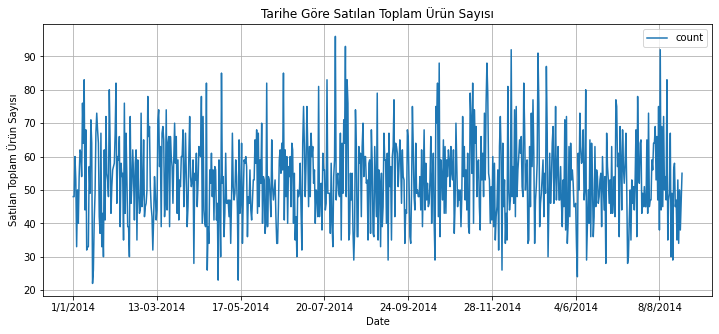

In [7]:
# Tarihe Göre Satılan Toplam Ürün sayısı
data.groupby(["Date"])["itemDescription"].agg(["count"]).plot(figsize=(12,5),grid = True)
plt.title("Tarihe Göre Satılan Toplam Ürün Sayısı")
plt.xlabel("Date")
plt.ylabel("Satılan Toplam Ürün Sayısı")
plt.show()

In [8]:
len(data["Member_number"].unique())

3898

In [9]:
# veri setinde toplamda 167 çeşit ürün var
len(data["itemDescription"].unique())

167

In [10]:
# Veri setimizde her bir ürünün frekansı 
data["itemDescription"].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

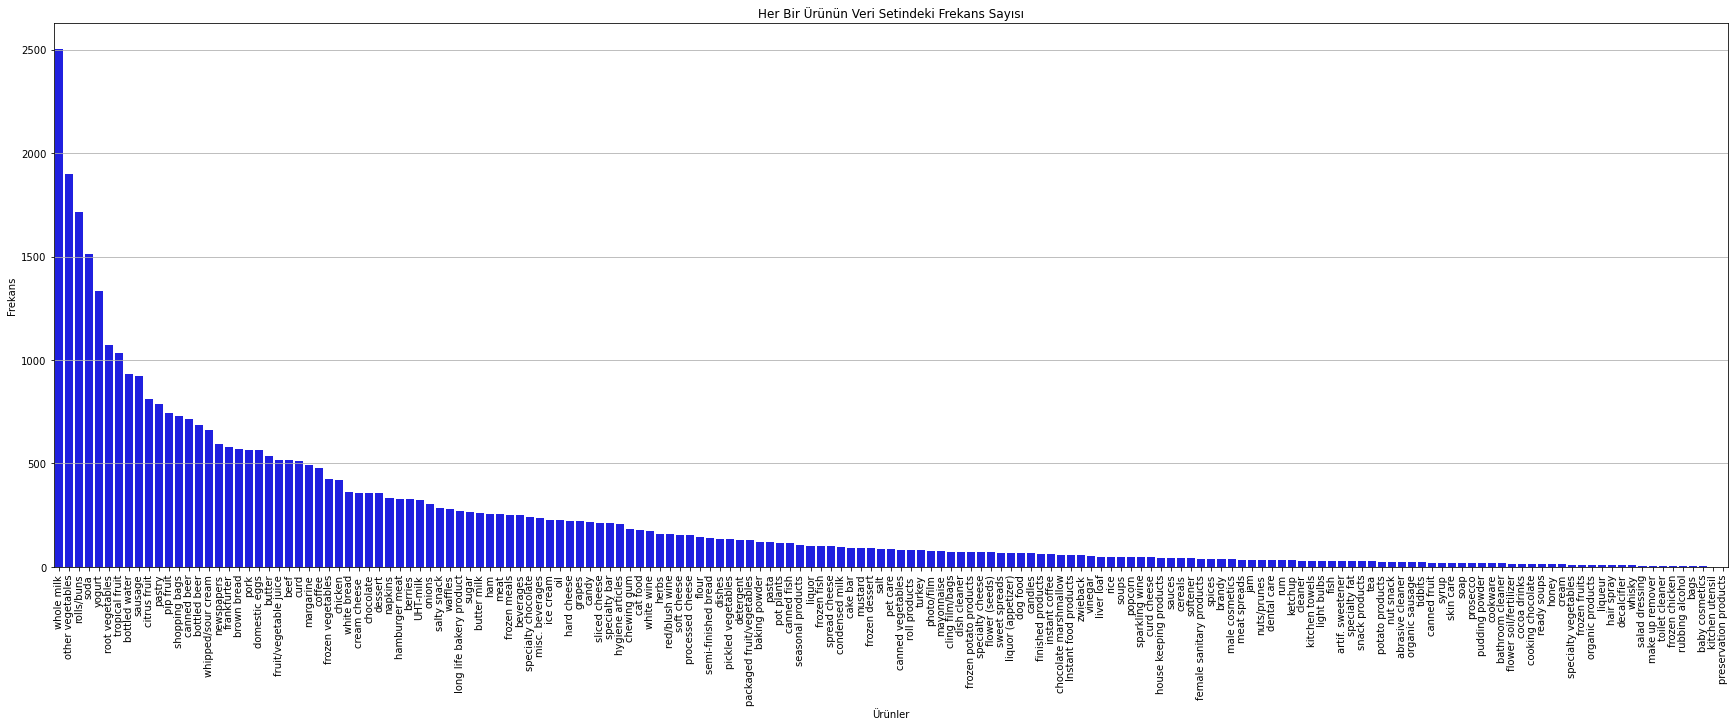

In [11]:
# Ürünlerin Frekansları
plt.figure(figsize = (30,10))
plt.grid()
sns.barplot(x = data.itemDescription.value_counts().keys(),y = data.itemDescription.value_counts().values,color="Blue")
plt.title("Her Bir Ürünün Veri Setindeki Frekans Sayısı")
plt.xlabel("Ürünler")
plt.ylabel("Frekans")
plt.xticks(rotation=90)
plt.show()

In [12]:
# 728 benzersiz tarih var veri setimizde
len(data.Date.unique())

728

##  Apriori

In [13]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38760,4471,8/10/2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice


In [14]:
df=data.groupby(['Member_number','Date'])['itemDescription'].value_counts()
df

Member_number  Date        itemDescription      
1000           15-03-2015  sausage                  1
                           semi-finished bread      1
                           whole milk               1
                           yogurt                   1
               24-06-2014  pastry                   1
                                                   ..
5000           10/2/2015   soda                     1
               16-11-2014  bottled beer             1
                           other vegetables         1
               9/3/2014    fruit/vegetable juice    1
                           onions                   1
Name: itemDescription, Length: 38006, dtype: int64

In [15]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
df

Member_number  Date      
1000           15-03-2015    sausagewhole milksemi-finished breadyogurt
               24-06-2014                   whole milkpastrysalty snack
               24-07-2015                    canned beermisc. beverages
               25-11-2015                       sausagehygiene articles
               27-05-2015                        sodapickled vegetables
                                                ...                    
4999           26-12-2015                            bottled waterherbs
               9/4/2014                   semi-finished breadnewspapers
5000           10/2/2015         sodaroot vegetablessemi-finished bread
               16-11-2014                  bottled beerother vegetables
               9/3/2014                     fruit/vegetable juiceonions
Name: itemDescription, Length: 14963, dtype: object

In [16]:
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen vegetables', 'other vegetables'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropi

In [17]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [43]:
apriori_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
a = apriori_items.sort_values("support",ascending = False)
a.head(20)

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
110,0.069572,(root vegetables)
139,0.067767,(tropical fruit)
10,0.060683,(bottled water)
115,0.060349,(sausage)
28,0.053131,(citrus fruit)


In [21]:
rules = association_rules(apriori_items, metric="confidence", min_threshold=0.001)

In [22]:
rules.sort_values('confidence', ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1209,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1226,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
1221,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
1233,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
584,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814
728,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659
148,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
654,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743


In [26]:
rules.sort_values('lift', ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1235,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
1234,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1233,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1236,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
475,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
474,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
1232,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1237,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
618,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118
619,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969


In [24]:
rules.sort_values('support', ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
952,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
953,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
1057,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
1056,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
1136,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
1137,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
1183,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
1182,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
921,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
920,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
